## K-means clustering
In this homework your task will be to try the k-means clustering algorithm on a different dataset with various settings.

Let's use the wine dataset, which has 13 features and 3 sorts (classes) of wine (unnamed).

In [0]:
# import ...
wine = datasets.load_wine()

In [0]:
# Convert the dataset into the pandas DataFrame
X = ...
y = ...

In [0]:
# Let's try some scatter plots first to see if any feature combination gives seems promising for a clustering algorithm.
plt.subplot(...) # Make more than one subplot
plt.scatter(...)
plt.title(...)

A clustering algorithm (here: k-means) can, of course, work with more than two features, however, for the sake of nice visualizations, let's use two features at a time. Later, we can include more features and see if our performance measures suggest any improvement. 

In [0]:
# Pick some two features that seem to give nice separated clusters in the plots above:
features_2 = ['feature0','feature1'] # replace with your feature names
X_2 = X[features_2]

**Note:** do not forget to scale your features!

In [0]:
# Now apply k-means to your data. Determine the best k value using WCSS method:
...
# Repeat this for 3 different pairs of features, see which one works best.
...

### Clustering evaluation:

Evaluation of the result of a clustering algorithm is a more difficult task than for classification, because in the general case the ground truth (the correct answers/labels) is not available; in fact, there is often no target variable. Additionally, evaluating an algorithm using the same distance measure as the one it was produced with can be biased. 

There are, however, nevertheless, multuiple evaluation measures, both for the case where the ground truth data is present and when it is absent. In this homework, let's consider a few of these measures: Adjusted Rand index, Homogeneity, completeness and V-measure; and Silhouette Coefficient. Both of them are implemented in the *sklearn* library.

**Adjusted Rand index** requires ground truth labels and compares them to the labels produced by the clustering algorithm (the way they are named/numbered does not matter). The result is a number in the range [-1, 1].

**Homogeneity, completeness and V-measure** also require ground truth labels. These measures are very similar to per-cluster precision, recall and F1-score:
**Homogeneity** score is at its maximum if each cluster contains only members of a single class. In turn, **completeness** attains its maximum when all members of a given class are assigned to the same cluster.

For mathematical formula, reference, code and more evaluation metrics, see:  **[Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)**.


In [0]:
# For each of the instances of the clustering algorithm implemented earlier, complute the evaluation measures, as defined above. You can use the code provided in the link above.
# You can also use these measures to see how the k-means algorithm performs when given all 13 features.
# The output can be a table, with rows being algorithm evaluation instances (different features, different k) and columns being evaluation metrics.

## Optional: Hierarchical clustering
Let's explore another type of clustering algorithms in more detail using the wine dataset (3 classes). Hierarchical clustering algorithms (HCA) (https://en.wikipedia.org/wiki/K-means_clustering) also produces clusters, however, it does so also producing a dendrogram (tree structure) of the clusters, thus the name of the technique. 

There are two main approaches: 
1. Top-down (divisive): start with everything in one cluster and split it;
2. Bottom-up (agglomerative): start with each instance being its own cluster and then merge them.

The image below shows the algorithm (agglomerative clustering) and an example output.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import datasets, cluster
%matplotlib inline

In [0]:
# Let's use wine again
wine = datasets.load_wine()

In [0]:
# Convert it to pandas dataframe if necessary
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Target'])

Like k-means clustering, hierarchical clustering also requires a **distance measure** (the parameter is called 'affinity'). Euclidean distance metric is used as a default.

Apart from the distance metric, the algorithm also needs a **linkage criterion**. The linkage criterion determines **from where** the distance is computed, in other words, how is the distance between the two clusters is defined. The distance (e.g. euclidean) between two clusters can be measured as the distance between their closest elements (single linkage), their farthest elements (complete linkage), their centers (average linkage). A reasonable default choice is the Ward's method.

The choice of both metric and linkage can be determined from the domain knowledge (not always possible) or by validation (if clustering eventually used for classification).

In practice, hierarchical clustering is used less often than k-means.

In [0]:
# Let's apply clustering to several different pairs of features first
two_features = ['feature 1','feature 2'] # replace with appropriate features
# two_features = ['alcohol', 'malic_acid']
average_agglomerative_clustering = cluster.AgglomerativeClustering(
        n_clusters=3, linkage='average', affinity='euclidean')
predicted = average_agglomerative_clustering.fit(X.iloc[0:20,:]);

In [0]:
# Plot the clusters (colored as prediction results) as a scatterplot, as well as the actual labels
# Disclaimer: this is just for testing purposes
...

Let's also print the actual dendrogram produced by the algorithm (more easily seen with a few instances):

In [0]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

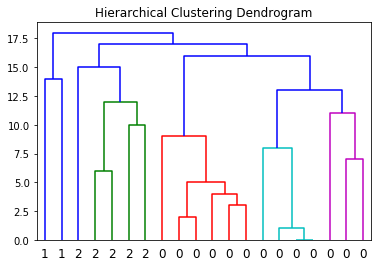

In [79]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(predicted, labels=predicted.labels_)
plt.show()